<a href="https://colab.research.google.com/github/napolitanodst/Apprenticeship-log/blob/Apprenticeship-Code/Neural_definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Modello
model = tf.keras.models.Sequential(
    [
       tf.keras.layers.Flatten(input_shape=(28, 28),name="input_layer"),
       tf.keras.layers.Rescaling(1./255, name="rescaling_layer"),
       tf.keras.layers.Dense(56, activation="sigmoid", name="primo_layer"),
       tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
   ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 rescaling_layer (Rescaling)  (None, 784)              0         
                                                                 
 primo_layer (Dense)         (None, 56)                43960     
                                                                 
 output_layer (Dense)        (None, 10)                570       
                                                                 
Total params: 44,530
Trainable params: 44,530
Non-trainable params: 0
_________________________________________________________________


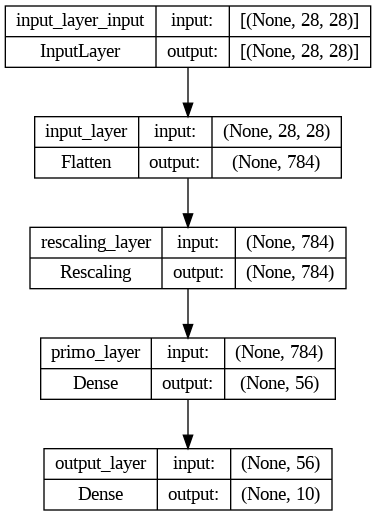

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [6]:
# Callback per visualizzare i pesi ad ogni epoch
history_pesi =[]
history_bias =[]
class Epoche(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs=None):
            weights = model.get_weights()[0]
            biases = model.get_weights()[1]
            w1 = weights
            b1 = biases
            we= [w1[0]]
            bi= [b1[0]]
            history_pesi.append(we)
            history_bias.append(bi)
chiamata = Epoche()

In [8]:
# Training
epo=15
history = model.fit(x_train, y_train, epochs=epo, callbacks=chiamata)
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9436 - accuracy: 0.8119
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6288 - accuracy: 0.8577
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5080 - accuracy: 0.8761
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4447 - accuracy: 0.8862
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8930
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3790 - accuracy: 0.8975
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3591 - accuracy: 0.9017
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3439 - accuracy: 0.9047
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3312 - accuracy: 0.9077
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.320

In [28]:
plott = np.array(history_pesi)
plot = plott[14:15]
prova= np.squeeze(plot)

<AxesSubplot:>

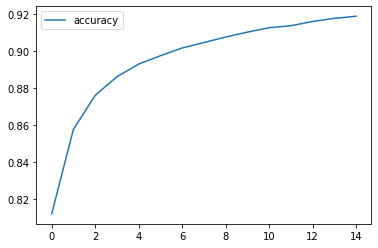

In [13]:
# Plot dell'accuracy
pd.DataFrame(history.history)[["accuracy",]].plot()


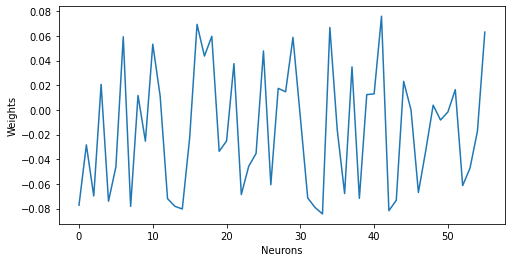

In [30]:
#Plot dei pesi
plt.figure(1,figsize=(8,4))
plt.plot(prova)
plt.xlabel("Neurons")
plt.ylabel("Weights")
plt.show()

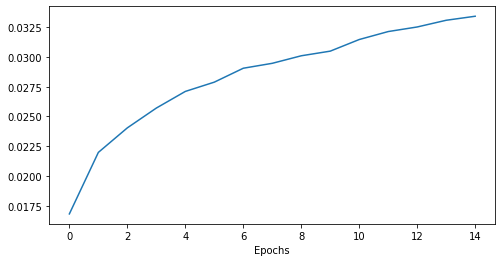

In [15]:
# Plot Bias
plt.figure(figsize=(8,4))
plt.plot(history_bias)
plt.xlabel("Epochs")
plt.show()